# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [80]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hmast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")
print(api_key)

71a4dd4304a94182910e2f6a0435e0ab


In [82]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [83]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_top_headlines(q='bitcoin',category="business", language= "en")

btc_news

{'status': 'ok',
 'totalResults': 22,
 'articles': [{'source': {'id': None, 'name': 'The Guardian'},
   'author': 'Graeme Wearden, Richard Partington',
   'title': 'Fed warns of rising risky asset prices, as stocks and bitcoin hit record highs – business live - The Guardian',
   'description': 'Rolling coverage of the latest economic and financial news',
   'url': 'https://www.theguardian.com/business/live/2021/nov/09/fed-warning-stock-markets-bitcoin-inflation-economy-business-live',
   'urlToImage': 'https://i.guim.co.uk/img/media/a49de617b5d46c3aee0f2810d03c89058d2d2bb6/913_830_3318_1991/master/3318.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctbGl2ZS5wbmc&enable=upscale&s=4b8899439c7df12f64603a631edf2394',
   'publishedAt': '2021-11-09T08:37:38Z',
   'content': None},
  {'source': {'id': None, 'name': 'The Guardian'},
   'author': 'Julia Kollewe',
   'title': 'Bitcoin price sur

In [84]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_top_headlines(q='ethereum',category="business", language= "en")

eth_news

{'status': 'ok',
 'totalResults': 3,
 'articles': [{'source': {'id': None, 'name': 'The Guardian'},
   'author': 'Julia Kollewe',
   'title': 'Bitcoin price surges to record high of more than $68,000 - The Guardian',
   'description': 'Other cryptocurrencies such as ethereum also reach records as investors hedge against inflation',
   'url': 'https://amp.theguardian.com/technology/2021/nov/09/bitcoin-price-record-high-cryptocurrencies-ethereum',
   'urlToImage': 'https://i.guim.co.uk/img/media/ffb2ff23c1a902d81d676eb24edf4ca91c9d65fd/0_400_6000_3600/master/6000.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=56f76853fe9195ceb4fe7daec45b6a0d',
   'publishedAt': '2021-11-09T08:33:00Z',
   'content': 'The bitcoin price has reached a new record high, breaking through $68,000 (£50,000), and analysts predict that the worlds best-known cryptocurrency will ri

In [85]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentinments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentinments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentinments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-09,The bitcoin price has reached a new record hig...,0.1027,0.045,0.000,0.955
1,2021-11-09,"Bitcoin (BTC) is clinging to $68,000 on Nov. 9...",0.6249,0.150,0.000,0.850
2,2021-11-09,The world cryptocurrency market is worth more ...,0.5719,0.164,0.000,0.836
3,2021-11-09,SYDNEY : Bitcoin and ether made record peaks i...,0.3612,0.145,0.078,0.777
4,2021-11-09,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000


In [86]:
# Create the Ethereum sentiment scores DataFrame
eth_sentinments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentinments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentinments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-09,The bitcoin price has reached a new record hig...,0.1027,0.045,0.0,0.955
1,2021-11-09,"Bitcoin and Ethereum, the largest and second-l...",0.5719,0.128,0.0,0.872


In [87]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,15.000000,15.000000,15.00000,15.000000
mean,0.289673,0.073867,0.00520,0.920933
std,0.288982,0.071956,0.02014,0.079849
min,0.000000,0.000000,0.00000,0.777000
25%,0.000000,0.000000,0.00000,0.861000
50%,0.340000,0.066000,0.00000,0.934000
75%,0.571900,0.136500,0.00000,1.000000
max,0.778300,0.191000,0.07800,1.000000


In [88]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,2.000000,2.00000,2.0,2.00000
mean,0.337300,0.08650,0.0,0.91350
std,0.331775,0.05869,0.0,0.05869
min,0.102700,0.04500,0.0,0.87200
25%,0.220000,0.06575,0.0,0.89275
50%,0.337300,0.08650,0.0,0.91350
75%,0.454600,0.10725,0.0,0.93425
max,0.571900,0.12800,0.0,0.95500


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH slightly, although the sample size is very low for both

Q: Which coin had the highest compound score?

A: BTC had the highest, likely since ETH sample size was so much lower

Q. Which coin had the highest positive score?

A: BTC again, though also likely due to low sample size for ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [89]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [90]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw_list = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
sw_addon = {}

In [91]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text done
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words done
    lem = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase
    lem = [word.lower() for word in lem]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [92]:
# Create a new tokens column for Bitcoin
btc_words = []
for article in btc_news["articles"]:
    btc_words += tokenizer(str(article["content"]))
btc_words

['none',
 'bitcoin',
 'price',
 'ha',
 'reached',
 'new',
 'record',
 'high',
 'breaking',
 'analyst',
 'predict',
 'world',
 'bestknown',
 'cryptocurrency',
 'rise',
 'coming',
 'weeksthis',
 'beat',
 'char',
 'bitcoin',
 'btc',
 'clinging',
 'nov',
 'trader',
 'declared',
 'clear',
 'takeoff',
 'ready',
 'begin',
 'price',
 'discoverybtcusd',
 'hour',
 'candle',
 'chart',
 'bitstamp',
 'source',
 'tradingview',
 'char',
 'world',
 'cryptocurrency',
 'market',
 'worth',
 'trillion',
 'first',
 'time',
 'according',
 'calculation',
 'monday',
 'mainstream',
 'investor',
 'increasingly',
 'jump',
 'boardthe',
 'value',
 'ha',
 'reached',
 'char',
 'none',
 'sydney',
 'bitcoin',
 'ether',
 'made',
 'record',
 'peak',
 'asia',
 'trade',
 'tuesday',
 'enthusiasm',
 'cryptocurrency',
 'adoption',
 'worry',
 'inflation',
 'driving',
 'momentum',
 'flow',
 'asset',
 'classbitcoin',
 'char',
 'representation',
 'virtual',
 'cryptocurrency',
 'ethereum',
 'seen',
 'among',
 'representation',
 '

In [93]:
# Create a new tokens column for Ethereum
eth_words = []
for article in eth_news["articles"]:
    eth_words += tokenizer(str(article["content"]))
eth_words

['bitcoin',
 'price',
 'ha',
 'reached',
 'new',
 'record',
 'high',
 'breaking',
 'analyst',
 'predict',
 'world',
 'bestknown',
 'cryptocurrency',
 'rise',
 'coming',
 'weeksthis',
 'beat',
 'char',
 'bitcoin',
 'ethereum',
 'largest',
 'secondlargest',
 'cryptocurrencies',
 'world',
 'surged',
 'new',
 'high',
 'monday',
 'rising',
 'far',
 'respectively',
 'case',
 'bitcoin',
 'fresh',
 'char',
 'none']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [94]:
from collections import Counter
from nltk import ngrams

In [95]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = Counter(ngrams(btc_words, n=2))

In [96]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = Counter(ngrams(eth_words, n=2))

In [97]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    return Counter(tokens).most_common(N)

In [98]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_words,10)

[('char', 15),
 ('bitcoin', 10),
 ('cryptocurrency', 9),
 ('new', 4),
 ('high', 4),
 ('world', 4),
 ('monday', 4),
 ('none', 3),
 ('price', 3),
 ('btc', 3)]

In [99]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_words,10)

[('bitcoin', 3),
 ('new', 2),
 ('high', 2),
 ('world', 2),
 ('char', 2),
 ('price', 1),
 ('ha', 1),
 ('reached', 1),
 ('record', 1),
 ('breaking', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

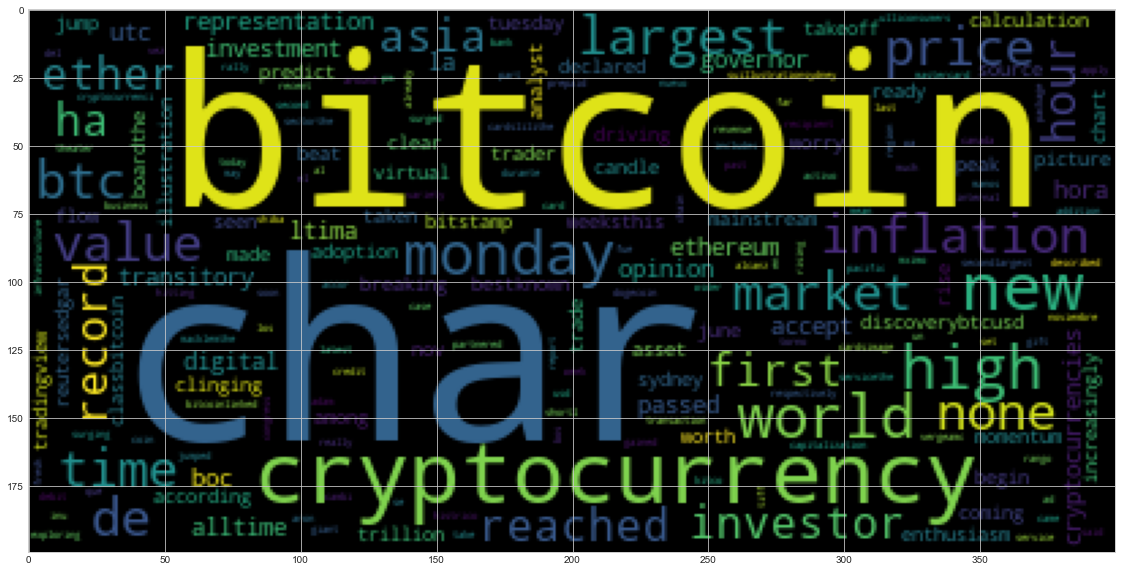

In [101]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(" ".join(str(x) for x in btc_words))
plt.imshow(btc_wc)

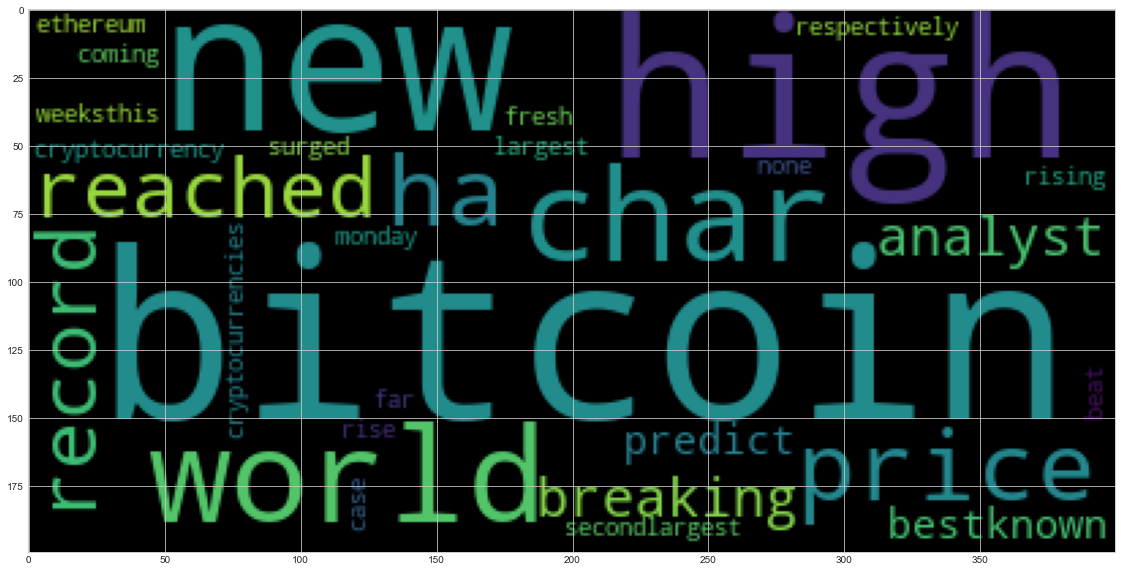

In [102]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(" ".join(str(x) for x in eth_words))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [103]:
import spacy
from spacy import displacy

In [104]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [105]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [106]:
# Concatenate all of the Bitcoin text together
btc_text = ""
for article in btc_news["articles"]:
    btc_text += str(article["content"])
btc_text

'NoneThe bitcoin price has reached a new record high, breaking through $68,000 (£50,000), and analysts predict that the worlds best-known cryptocurrency will rise further in the coming weeks.\r\nThis beats … [+2131 chars]Bitcoin (BTC) is clinging to $68,000 on Nov. 9 after traders declared it "clear for take-off" and ready to begin further price discovery.\r\nBTC/USD 1-hour candle chart (Bitstamp). Source: TradingView\r… [+2342 chars]The world cryptocurrency market is worth more than $3 trillion for the first time, according to calculations Monday, as mainstream investors increasingly jump on board.\r\nThe value has reached $3.007 … [+1558 chars]NoneSYDNEY : Bitcoin and ether made record peaks in Asia trade on Tuesday, with enthusiasm for cryptocurrency adoption and worry about inflation driving momentum and flows into the asset class.\r\nBitcoin … [+2660 chars]A representation of the virtual cryptocurrency Ethereum is seen among representations of other cryptocurrencies in this pictur

In [107]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!

In [108]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [109]:
# List all Entities
print([btc_ner.ents]) 

[(NoneThe, 68,000, 50,000, the coming weeks, 68,000, Nov. 9, more than $3 trillion, first, Monday, 3.007, Asia, Tuesday, Ethereum, June 14, 2021, REUTERS, Edgar Su/IllustrationSYDNEY, past $67,000, first, as much as 2, Ethereum, second, Monday, as far as $67,700 and $4800, un, nuevo máximo histórico, la última vez, el activo cambió de manos, al rango de los USD 67,000, Durante, última hora del 8 de noviembre, hora UTC, Verge, AMC, Adam Aron, today, Shiba Inu, 67,000, 11:14 p.m., UTC, Monday, second, 4,794.99, Mastercard, the Bank of Canada, Tiff Macklem, the Internal Revenue Service, Congress, last week, R1 million, South African, Luno, Valr, Monday, morning)]


---

### Ethereum NER

In [110]:
# Concatenate all of the Ethereum text together
eth_text = ""
for article in eth_news["articles"]:
    eth_text += str(article["content"])
eth_text

'The bitcoin price has reached a new record high, breaking through $68,000 (£50,000), and analysts predict that the worlds best-known cryptocurrency will rise further in the coming weeks.\r\nThis beats … [+2131 chars]Bitcoin and Ethereum, the largest and second-largest cryptocurrencies in the world, surged to new highs on Monday, rising as far as $67,700 and $4800, respectively. In the case of Bitcoin, the fresh … [+1462 chars]None'

In [111]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!

In [112]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [113]:
# List all Entities
print([eth_ner.ents]) 

[(68,000, 50,000, the coming weeks, Ethereum, second, Monday, as far as $67,700 and $4800)]


---